# Exercício 03

In [24]:
# Pacotes e funções úteis:

using LinearAlgebra, JuMP, Ipopt

include("./desenha.jl");

Considere os seguintes polígonos dados pelos seus vértices:
$$
P_{1} = \begin{bmatrix} (0, 0), (2, 0), (2, 2), (0, 2) \end{bmatrix},
$$
$$
P_{2} = \begin{bmatrix} (4, 0), (6, 0), (7, 1.73), (6, 3.46), (4, 3.46), (3, 1.73) \end{bmatrix},
$$
e
$$
P_{2} = \begin{bmatrix} (8, 2), (10, 0), (16,
3), (15, 4), (11, 2), (9, 3)\end{bmatrix}.
$$
Considere também os círculos com centros em $(2, 6)$ e $(6, 6)$, de raios $1$ e $2$, respectivamente.

1. Qual a menor faixa retangular com a qual seja possível dispor os objetos sem que haja sobreposição? Modele o problema utilizando apenas triângulos. Plote o problema e a solução encontrada.

In [41]:
P_1_triangular = [[0.0 0.0; 2.0 0.0; 0.0 2.0],[0.0 0.0; 0.0 2.0; 2.0 2.0]]
p_2_triangular=[[4.0 0.0; 6.0 0.0; 7.0 1.73], [4.0 0.0; 7.0 1.73; 6.0 3.46], [4.0 0.0; 6.0 3.46; 4.0 3.46], [4.0 0.0; 4.0 3.46;3.0 1.73 ]]
p_3_triangular =[[8.0 2.0; 10.0 0.0; 11.0 2.0],[8.0 2.0; 11.0 2.0; 9.0 3.0],[10.0 0.0; 15.0 4.0; 11.0 2.0],[10.0 0.0; 16.0 3.0; 5.0 4.0]]

#poligono 1
n = size(P_1_triangular[1])[1]
P_1t = zeros(n, 2) 
for i=1:n
    P_1t[i, :] =(P_1_triangular[1])[i, :] - (P_1_triangular[1])[1, :]
end
n_2 = size(P_1_triangular[2])[1]
P_2t = zeros(n_2, 2) 
for i=1:n_2
    P_2t[i, :] =(P_1_triangular[2])[i, :] - (P_1_triangular[2])[1, :]
end


#poligono 2

n_3 = size(p_2_triangular[1])[1]
P_3t = zeros(n_3, 2) 
for i=1:n_3
    P_3t[i, :] =(p_2_triangular[1])[i, :] - (p_2_triangular[1])[1, :]
 end

n_4 = size(p_2_triangular[2])[1]
P_4t = zeros(n_4, 2) 
for i=1:n_4
    P_4t[i, :] =(p_2_triangular[2])[i, :] - (p_2_triangular[2])[1, :]
end
n_5 = size(p_2_triangular[3])[1]
P_5t = zeros(n_5, 2) 
for i=1:n_5
    P_5t[i, :] =(p_2_triangular[3])[i, :] - (p_2_triangular[3])[1, :]
end
n_6 = size(p_2_triangular[4])[1]
P_6t = zeros(n_6, 2) 
for i=1:n_6
    P_6t[i, :] =(p_2_triangular[4])[i, :] - (p_2_triangular[4])[1, :]
end
#poligono3
n_7 = size(p_3_triangular[1])[1]
P_7t = zeros(n_7, 2) 
for i=1:n_7
    P_7t[i, :] =(p_3_triangular[1])[i, :] - (p_3_triangular[1])[1, :]
end

n_8 = size(p_3_triangular[2])[1]
P_8t = zeros(n_8, 2) 
for i=1:n_8
    P_7t[i, :] =(p_3_triangular[2])[i, :] - (p_3_triangular[2])[1, :]
end

n_9 = size(p_3_triangular[3])[1]
P_9t = zeros(n_9, 2) 
for i=1:n_9
    P_9t[i, :] =(p_3_triangular[3])[i, :] - (p_3_triangular[3])[1, :]
end


n_10 = size(p_3_triangular[4])[1]
P_10t = zeros(n_10, 2) 
for i=1:n_10
    P_10t[i, :] =(p_3_triangular[4])[i, :] - (p_3_triangular[4])[1, :]
end
#retas
 reta = P_1t[1:2, :]
reta_2 = P_2t[1:2, :]
reta_3 = P_3t[1:2, :]
reta_4 = P_4t[1:2, :]
reta_5 = P_5t[1:2, :]
reta_6 = P_6t[1:2, :]
reta_7 = P_7t[1:2, :]
reta_8 = P_8t[1:2, :]
reta_9 = P_9t[1:2, :]
reta_10 =P_10t[1:2, :]

#modelo criado
#variaveis
model = Model(Ipopt.Optimizer)
@variable(model, xP[1:3])
@variable(model, yP[1:3])
@variable(model, theta_P[1:3])
@variable(model, xL)
@variable(model, yL)
@variable(model,xC[1:2])
@variable(model,yC[1:2])


#modelos não lineares
#triangulo 1
@NLexpression(model, NLe1[i=1:n], 
    P_1t[i, 1] * cos(theta_P[1]) - P_1t[i, 2] * sin(theta_P[1]) + xP[1] )
@NLexpression(model, NLe2[i=1:n], 
    P_1t[i, 1] * sin(theta_P[1]) + P_1t[i, 2] * cos(theta_P[1]) + yP[1] )
#triangulo 2
@NLexpression(model, NLe1[i=1:n_2], 
    P_2t[i, 1] * cos(theta_P[1]) - P_2t[i, 2] * sin(theta_P[1]) + xP[1] )
@NLexpression(model, NLe2[i=1:n], 
    P_1t[i, 1] * sin(theta_P[1]) + P_2t[i, 2] * cos(theta_P[1]) + yP[1] )


#poligono 2
#triangulo_1
@NLexpression(model, NLe1[i=1:n_3], 
    P_3t[i, 1] * cos(theta_P[2]) - P_3t[i, 2] * sin(theta_P[2]) + xP[2] )
@NLexpression(model, NLe2[i=1:n_3], 
    P_3t[i, 1] * sin(theta_P[2]) + P_3t[i, 2] * cos(theta_P[2]) + yP[2] )

#triangulo_2
@NLexpression(model, NLe1[i=1:n_4], 
    P_4t[i, 1] * cos(theta_P[2]) - P_4t[i, 2] * sin(theta_P[2]) + xP[2] )
@NLexpression(model, NLe2[i=1:n_4], 
    P_4t[i, 1] * sin(theta_P[2]) + P_4t[i, 2] * cos(theta_P[2]) + yP[2] )

#triangulo_3
@NLexpression(model, NLe1[i=1:n_5], 
    P_5t[i, 1] * cos(theta_P[2]) - P_5t[i, 2] * sin(theta_P[2]) + xP[2] )
@NLexpression(model, NLe2[i=1:n_3], 
    P_5t[i, 1] * sin(theta_P[2]) + P_5t[i, 2] * cos(theta_P[2]) + yP[2] )


#triangulo_4
@NLexpression(model, NLe1[i=1:n_6], 
    P_6t[i, 1] * cos(theta_P[2]) - P_6t[i, 2] * sin(theta_P[2]) + xP[2] )
@NLexpression(model, NLe2[i=1:n_3], 
    P_6t[i, 1] * sin(theta_P[2]) + P_6t[i, 2] * cos(theta_P[2]) + yP[2] )

#poligono3

#triangulo_1
@NLexpression(model, NLe1[i=1:n_7], 
    P_7t[i, 1] * cos(theta_P[3]) - P_8t[i, 2] * sin(theta_P[3]) + xP[3] )
@NLexpression(model, NLe2[i=1:n_7], 
    P_7t[i, 1] * sin(theta_P[3]) + P_7t[i, 2] * cos(theta_P[3]) + yP[3] )

#triangulo_2
@NLexpression(model, NLe1[i=1:n_8], 
    P_8t[i, 1] * cos(theta_P[3]) - P_8t[i, 2] * sin(theta_P[3]) + xP[3] )
@NLexpression(model, NLe2[i=1:n_8], 
    P_8t[i, 1] * sin(theta_P[3]) + P_8t[i, 2] * cos(theta_P[3]) + yP[3] )
#triangulo_3
@NLexpression(model, NLe1[i=1:n_9], 
    P_9t[i, 1] * cos(theta_P[3]) - P_9t[i, 2] * sin(theta_P[3]) + xP[3] )
@NLexpression(model, NLe2[i=1:n_9], 
    P_9t[i, 1] * sin(theta_P[3]) + P_9t[i, 2] * cos(theta_P[3]) + yP[3] )
#triangulo_4
@NLexpression(model, NLe1[i=1:n_9], 
    P_10t[i, 1] * cos(theta_P[3]) - P_10t[i, 2] * sin(theta_P[3]) + xP[3] )
@NLexpression(model, NLe2[i=1:n_9], 
    P_10t[i, 1] * sin(theta_P[3]) + P_10t[i, 2] * cos(theta_P[3]) + yP[3] )



LoadError: An object of name NLe1 is already attached to this model. If this
    is intended, consider using the anonymous construction syntax, e.g.,
    `x = @variable(model, [1:N], ...)` where the name of the object does
    not appear inside the macro.

    Alternatively, use `unregister(model, :NLe1)` to first unregister
    the existing name from the model. Note that this will not delete the
    object; it will just remove the reference at `model[:NLe1]`.


# 2. Agora, tente responder a mesma pergunta, mas modele o problema empregando o menor número possível de conponentes convexas. Plote o problema e a solução encontrada.

In [39]:
p1 = [[0.0 0.0; 2.0 0.0; 2.0 2.0; 0.0 2.0]]
p_3 =[[8.0 2.0; 10.0 0.0; 11.0 2.0; 9.0 3.0], [10.0 0.0; 16.0 3.0; 15.0 4.0; 11.0 2.0]]
p_2=[[4.0 0.0; 6.0 0.0; 7.0 1.73], [4.0 0.0; 7.0 1.73; 6.0 3.46], [4.0 0.0; 6.0 3.46; 4.0 3.46], [4.0 0.0; 4.0 3.46;3.0 1.73 ]]

#poligono_1
n = size(p1[1])[1]
P_refe = zeros(n, 2) 
 for i=1:n
    P_refe[i, :] =(p1[1])[i, :] - (p1[1])[1, :]
 end
reta = P_refe[1:2, :]
#pol_3
n_3 = size(p1[1])[1]
P_refe = zeros(n_3, 2) 
 for i=1:n_3
    P_refe_3[i, :] =(p_3[1])[i, :] - (p_3[1])[1, :]
 end
reta_3 = P_refe_3[1:2, :]



#poligono 2

n_3 = size(p_2_triangular[1])[1]
P_3t = zeros(n_3, 2) 
for i=1:n_3
    P_3t[i, :] =(p_2_triangular[1])[i, :] - (p_2_triangular[1])[1, :]
 end
n_4 = size(p_2_triangular[2])[1]
P_4t = zeros(n_4, 2) 
for i=1:n_4
    P_4t[i, :] =(p_2_triangular[2])[i, :] - (p_2_triangular[2])[1, :]
end
n_5 = size(p_2_triangular[3])[1]
P_5t = zeros(n_5, 2) 
for i=1:n_5
    P_5t[i, :] =(p_2_triangular[3])[i, :] - (p_2_triangular[3])[1, :]
end
n_6 = size(p_2_triangular[4])[1]
P_6t = zeros(n_6, 2) 
for i=1:n_6
    P_6t[i, :] =(p_2_triangular[4])[i, :] - (p_2_triangular[4])[1, :]
end
reta_3 = P_3t[1:2, :]
reta_4 = P_4t[1:2, :]
reta_5 = P_5t[1:2, :]
reta_6 = P_6t[1:2, :]

#Modelo Criado
#variaveis
model = Model(Ipopt.Optimizer)
@variable(model, xP[1:3])
@variable(model, yP[1:3])
@variable(model, theta_P[1:2])
@variable(model, xL)
@variable(model, yL)
@variable(model,xC[1:2])
@variable(model,yC[1:2])



#expressões não lineares



3. Qual o impacto da mudança na modelagem na resolução do problema? Há alteração no número de avaliações de função? E iterações?

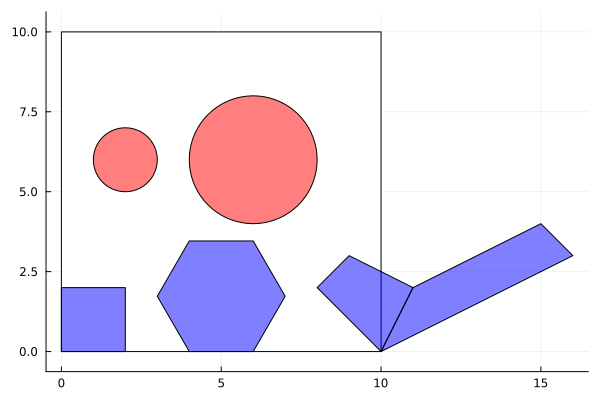

In [3]:
# Plot do problema.

poligonos = [
    [[0.0 0.0; 2.0 0.0; 2.0 2.0; 0.0 2.0]], 
    [[4.0 0.0; 6.0 0.0; 7.0 1.73; 6.0 3.46; 4.0 3.46; 3.0 1.73]],
    [[8.0 2.0; 10.0 0.0; 11.0 2.0; 9.0 3.0], [10.0 0.0; 16.0 3.0; 15.0 4.0; 11.0 2.0]]     ]




circulos_r = [1, 2]
circulos_c = [2.0 6.0; 6.0 6.0]

plota_problema(circulos_c, circulos_r, poligonos, 10, 10)